## Exploratory data analysis and movie recommender based on Movielens

# EDA

In [1]:
#Load data
import pandas as pd
import numpy as np
import seaborn as sns
u_cols = ['user_id', 'age', 'sex', 'occupation', 'zip_code']
users = pd.read_csv('ml-100k/u.user', sep='|', names=u_cols,
                    encoding='latin-1')
users.head()

,user_id,age,sex,occupation,zip_code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213


In [2]:
r_cols = ['user_id', 'movie_id', 'rating', 'unix_timestamp']
ratings = pd.read_csv('ml-100k/u.data', sep='\t', names=r_cols,
                      encoding='latin-1')
ratings.head()

,user_id,movie_id,rating,unix_timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


We can use heatmap to check the missing values

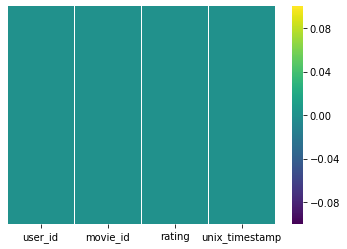

In [3]:
sns.heatmap(ratings.isnull(),yticklabels=False,cbar=True,cmap='viridis')

In [4]:
m_cols = ['movie_id', 'title', 'release_date', 'video_release_date', 'imdb_url']
movies = pd.read_csv('ml-100k/u.item', sep='|', names=m_cols, usecols=range(5),
                     encoding='latin-1')
movies.head()

,movie_id,title,release_date,video_release_date,imdb_url
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...
2,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...
3,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...
4,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995)


In [5]:
genres_list = ['unknown','Action','Adventure','Animation','Children','Comedy','Crime',
               'Documentary','Drama','Fantasy','Film-Noir','Horror','Musical','Mystery',
               'Romance','Sci-Fi','Thriller','War','Western']
genre = pd.read_csv('ml-100k/u.item', sep='|',names = genres_list,usecols = range(5,24),encoding = 'latin-1')
genre.head(5)

,unknown,Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0


Dropping redundant columns

In [6]:
movies.drop(['video_release_date','imdb_url'],inplace=True,axis = 1)
ratings.drop('unix_timestamp',axis = 1,inplace=True)

In [7]:
# merge all the dataset into one whole dataset
dataset = pd.merge(pd.merge(movies, ratings),users)
print(dataset.info())
dataset.head(5)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 0 to 99999
Data columns (total 9 columns):
movie_id        100000 non-null int64
title           100000 non-null object
release_date    99991 non-null object
user_id         100000 non-null int64
rating          100000 non-null int64
age             100000 non-null int64
sex             100000 non-null object
occupation      100000 non-null object
zip_code        100000 non-null object
dtypes: int64(4), object(5)
memory usage: 7.6+ MB
None


,movie_id,title,release_date,user_id,rating,age,sex,occupation,zip_code
0,1,Toy Story (1995),01-Jan-1995,308,4,60,M,retired,95076
1,4,Get Shorty (1995),01-Jan-1995,308,5,60,M,retired,95076
2,5,Copycat (1995),01-Jan-1995,308,4,60,M,retired,95076
3,7,Twelve Monkeys (1995),01-Jan-1995,308,4,60,M,retired,95076
4,8,Babe (1995),01-Jan-1995,308,5,60,M,retired,95076


In [8]:
# Totol movies in terms of genre
total_genre = genre.sum().sort_values(ascending=False)
total_genre

Drama          725
Comedy         505
Thriller       251
Action         251
Romance        247
Adventure      135
Children       122
Crime          109
Sci-Fi         101
Horror          92
War             71
Mystery         61
Musical         56
Documentary     50
Animation       42
Western         27
Film-Noir       24
Fantasy         22
unknown          2
dtype: int64

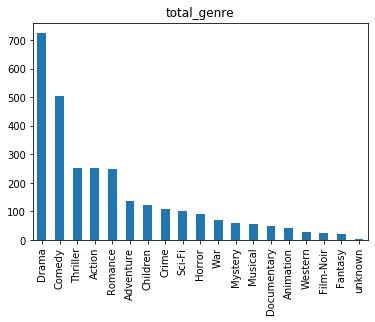

In [9]:
total_genre.plot(kind="bar",title="total_genre",label="count")

## Data analysis on rating

<font color=black size=3 face=雅黑>top 10 most rated movies</font>

In [10]:
dataset[['title','rating']].sort_values('rating', ascending=False).head(10)

,title,rating
48743,"Birdcage, The (1996)",5
46595,Singin' in the Rain (1952),5
20919,Shall We Dance? (1937),5
46621,Dumb & Dumber (1994),5
20917,Walking and Talking (1996),5
20914,When a Man Loves a Woman (1994),5
46625,Bullets Over Broadway (1994),5
20911,Prefontaine (1997),5
91551,Hoop Dreams (1994),5
86864,Kaspar Hauser (1993),5


<font color=black size=3 face=雅黑>top 25 rated movies</font>

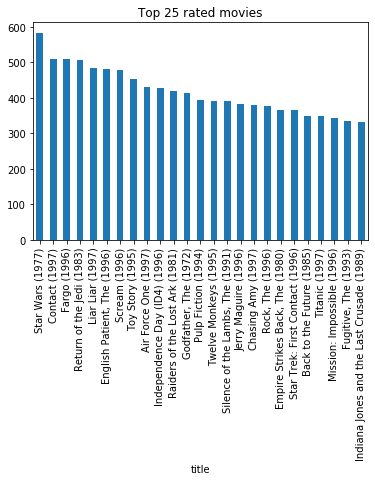

In [11]:
most_rated=dataset.groupby('title').size().sort_values(ascending=False)[:25]
most_rated.plot(kind="bar",title="Top 25 rated movies",label="count")

### k-means Clustering of Movie Ratings

We will consider a subset of users and discover what are their favourite genre by defining a function that will calculate each user’s average rating for all Romance and Science movies.

In [12]:
import matplotlib.pyplot as plt
movie = pd.read_csv('ml-100k/movies.csv')
rating = pd.read_csv('ml-100k/ratings.csv')
movie.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [13]:
# Function to get the genre ratings
def get_genre_ratings(ratings, movies, genres, column_names):
    genre_ratings = pd.DataFrame()
    for genre in genres:        
        genre_movies = movies[movies['genres'].str.contains(genre) ]
        avg_genre_votes_per_user = ratings[ratings['movieId'].isin(genre_movies['movieId'])].loc[:, ['userId', 'rating']].groupby(['userId'])['rating'].mean().round(2)       
        genre_ratings = pd.concat([genre_ratings, avg_genre_votes_per_user], axis=1)     
    genre_ratings.columns = column_names
    return genre_ratings

In [14]:
# Calculate the average rating of Romance and Science movies
genre_ratings = get_genre_ratings(rating, movie, ['Romance', 'Sci-Fi'], ['avg_romance_rating', 'avg_sci_rating'])
genre_ratings.head()

,avg_romance_rating,avg_sci_rating
1,4.31,4.22
2,4.50,3.88
3,0.50,4.20
4,3.38,2.83
5,3.09,2.50


The function get_genre_ratings calculated each user's average rating of all romance movies and all science movies. Let's bias our dataset a little by removing people who like both romance and science, just so that our clusters tend to define them as liking one genre more than the other.

In [15]:
# Function to get the biased dataset
def bias_genre_rating_dataset(genre_ratings, score_limit_1, score_limit_2):
    biased_dataset =    genre_ratings[((genre_ratings['avg_romance_rating'] < score_limit_1 - 0.2) & (genre_ratings['avg_sci_rating'] > score_limit_2)) | ((genre_ratings['avg_sci_rating'] < score_limit_1) & (genre_ratings['avg_romance_rating'] > score_limit_2))]
    biased_dataset = pd.concat([biased_dataset[:300], genre_ratings[:2]])
    biased_dataset = pd.DataFrame(biased_dataset.to_records())
    return biased_dataset
# Bias the dataset
biased_dataset = bias_genre_rating_dataset(genre_ratings, 3.2, 2.5)
# Printing  the head of the dataset
biased_dataset.head()

,index,avg_romance_rating,avg_sci_rating
0,3,0.50,4.20
1,4,3.38,2.83
2,5,3.09,2.50
3,7,2.65,3.15
4,9,3.17,3.00


We apply K-Means to break down the sample into two distinct groups.

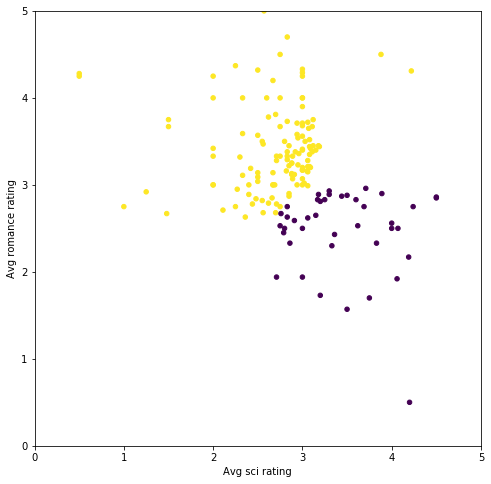

In [16]:
# Let's turn our dataset into a list
X = biased_dataset[['avg_sci_rating','avg_romance_rating']].values
# Import KMeans
from sklearn.cluster import KMeans
# Create an instance of KMeans to find two clusters
kmeans_1 = KMeans(n_clusters=2)
# Use fit_predict to cluster the dataset
predictions = kmeans_1.fit_predict(X)
# Defining the cluster plotting function
def draw_clusters(biased_dataset, predictions, cmap='viridis'):
    fig = plt.figure(figsize=(8,8))
    ax = fig.add_subplot(111)
    plt.xlim(0, 5)
    plt.ylim(0, 5)
    ax.set_xlabel('Avg sci rating')
    ax.set_ylabel('Avg romance rating')
    

    clustered = pd.concat([biased_dataset.reset_index(), pd.DataFrame({'group':predictions})], axis=1)
    plt.scatter(clustered['avg_sci_rating'], clustered['avg_romance_rating'], c=clustered['group'], s=20, cmap=cmap)
draw_clusters(biased_dataset, predictions)

It is evident that the grouping logic is based on how each person rated romance movies. People that averaged a rating on romance movies of 2.5 or higher will belong to one group, and people who averaged a rating of less than 3 will belong to the other.

#### What is the relationship betweeen 'Total Ratings' and 'average_rating'?

In [17]:
#Average_ratings
Average_ratings = pd.DataFrame(dataset.groupby('title')['rating'].mean())
#Average_ratings.head(10)
Average_ratings.rename(columns={'rating': 'average_rating'}, inplace=True)
Average_ratings.head(3)

,average_rating
title,
'Til There Was You (1997),2.333333
1-900 (1994),2.600000
101 Dalmatians (1996),2.908257


In [18]:
Average_ratings['Total Ratings'] = pd.DataFrame(dataset.groupby('title')['rating'].count())
Average_ratings.head()

,average_rating,Total Ratings
title,,
'Til There Was You (1997),2.333333,9
1-900 (1994),2.600000,5
101 Dalmatians (1996),2.908257,109
12 Angry Men (1957),4.344000,125
187 (1997),3.024390,41


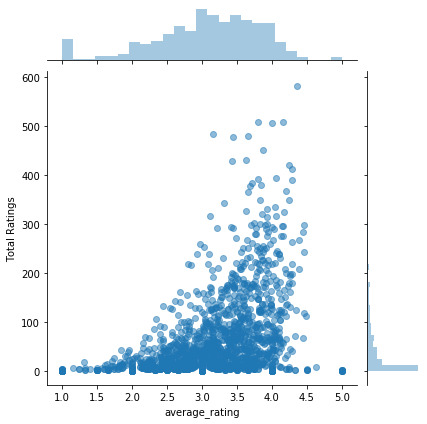

In [19]:
sns.jointplot(x='average_rating',y='Total Ratings', data=Average_ratings, alpha=0.5)

From the above, it looks like films with more ratings correlate to films with higher average ratings.
This makes sense, because more people will inevitably be drawn to watching those films that have higher ratings, and people will tend to avoid films that ratings suggest are bad.

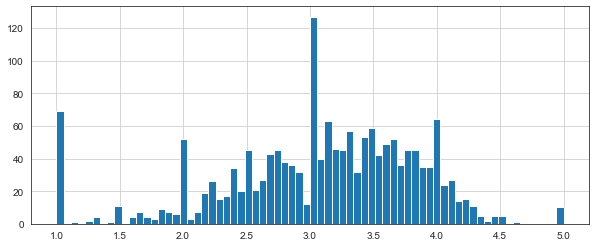

In [20]:
import matplotlib.pyplot as plt 
import seaborn as sns 
sns.set_style('white') 
%matplotlib inline

plt.figure(figsize=(10,4))
Average_ratings['average_rating'].hist(bins=70)

#### As can be seen from the figure above, the average score is lower if the score is less.

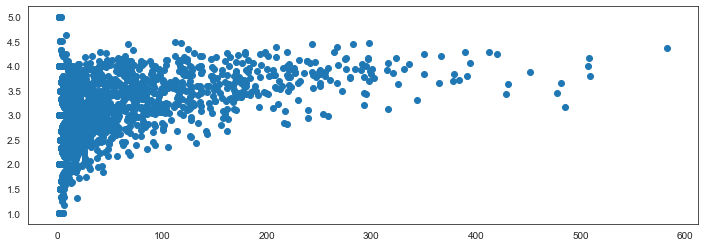

In [21]:
fig, ax = plt.subplots(1, 1, figsize=(12, 4))
ax.scatter(Average_ratings['Total Ratings'],Average_ratings['average_rating']);

##### From the perspective of the overall trend, the score is higher and the average score is higher. It can be seen that popular movies are indeed popular. 

# Movie Recommender

### Content-Based Recommendation

##### Content-based filtering is one of the common methods in building recommendation systems.

##### The system will recommend anything similar to an item you like before.

In [22]:
%%html
<img src="./1.JPG", width=400, heigth=240>

##### In model-building stage, the system first find the similarity between all pairs of items, then it uses the most similar items to a user’s already-rated items to generate a list of recommendations in recommendation stage.

### How to find the similarity between items?

#### Cosine similarity



As for the most important phase (similarity), we chose the method of Cosine Similarity. This method compare similarity by caculate cosine value of two different vectors. It mainly focus on the difference of direction, not the distance. The formula is:

sim(X,Y)=cosθ=(x ⃗∙y ⃗)/(||x||∙||y||)

#### Pearson correlation coefficient

Correlations are never lower than -1. A correlation of -1 indicates that the data points in a scatter plot lie exactly on a straight descending line; the two variables are perfectly negatively linearly related.

A correlation of 0 means that two variables don't have any linear relation whatsoever. However, some non linear relation may exist between the two variables.

Correlation coefficients are never higher than 1. A correlation coefficient of 1 means that two variables are perfectly positively linearly related; the dots in a scatter plot lie exactly on a straight ascending line.

Now we use Pearson correlation coefficient to build the recommender

In [23]:
import numpy as np
import pandas as pd
data = pd.read_csv('ml-100k/ratings.csv')
movie_titles_genre = pd.read_csv("ml-100k/movies.csv")
data = data.merge(movie_titles_genre,on='movieId', how='left')
data.head(10)

,userId,movieId,rating,timestamp,title,genres
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,1,3,4.0,964981247,Grumpier Old Men (1995),Comedy|Romance
2,1,6,4.0,964982224,Heat (1995),Action|Crime|Thriller
3,1,47,5.0,964983815,Seven (a.k.a. Se7en) (1995),Mystery|Thriller
4,1,50,5.0,964982931,"Usual Suspects, The (1995)",Crime|Mystery|Thriller
5,1,70,3.0,964982400,From Dusk Till Dawn (1996),Action|Comedy|Horror|Thriller
6,1,101,5.0,964980868,Bottle Rocket (1996),Adventure|Comedy|Crime|Romance
7,1,110,4.0,964982176,Braveheart (1995),Action|Drama|War
8,1,151,5.0,964984041,Rob Roy (1995),Action|Drama|Romance|War
9,1,157,5.0,964984100,Canadian Bacon (1995),Comedy|War


#### Feature Engineering

##### Average Rating:
##### The dataset is a collection of ratings by a number of users for different movies. Let’s find out the average rating for each and every movie in the dataset.

In [24]:
Average_ratings = pd.DataFrame(data.groupby('title')['rating'].mean())
Average_ratings.head(10)

,rating
title,
'71 (2014),4.000000
'Hellboy': The Seeds of Creation (2004),4.000000
'Round Midnight (1986),3.500000
'Salem's Lot (2004),5.000000
'Til There Was You (1997),4.000000
'Tis the Season for Love (2015),1.500000
"'burbs, The (1989)",3.176471
'night Mother (1986),3.000000
(500) Days of Summer (2009),3.666667


#### The rating of a movie is proportional to the total number of ratings it has. Therefore, we will also consider the total ratings cast for each movie.

In [25]:
Average_ratings['Total Ratings'] = pd.DataFrame(data.groupby('title')['rating'].count())
Average_ratings.head(10)

,rating,Total Ratings
title,,
'71 (2014),4.000000,1
'Hellboy': The Seeds of Creation (2004),4.000000,1
'Round Midnight (1986),3.500000,2
'Salem's Lot (2004),5.000000,1
'Til There Was You (1997),4.000000,2
'Tis the Season for Love (2015),1.500000,1
"'burbs, The (1989)",3.176471,17
'night Mother (1986),3.000000,1
(500) Days of Summer (2009),3.666667,42


#### Building The Recommender
#### Calculating The Correlation

In [26]:
movie_user = data.pivot_table(index='userId',columns='title',values='rating')

In [27]:
movie_user.head(10)

title,'71 (2014),'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),'Tis the Season for Love (2015),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987),...,Zulu (2013),[REC] (2007),[REC]² (2009),[REC]³ 3 Génesis (2012),anohana: The Flower We Saw That Day - The Movie (2013),eXistenZ (1999),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931)
userId,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN


The above code will create a table where the rows are userIds and the columns represent the movies. The values of the matrix represent the rating for each movie by each user.

To find the correlation value for the movie with all other movies in the data we will pass all the ratings of the picked movie to the corrwith method of the Pandas Dataframe. The method computes pairwise correlation between rows or columns of DataFrame with rows or columns of Series or DataFrame

In [28]:
def recommendation(moviename):
    correlations = movie_user.corrwith(movie_user[moviename],method='pearson')
    recommendation = pd.DataFrame(correlations,columns=['Correlation'])
    recommendation.dropna(inplace=True)
    recommendation = recommendation.join(Average_ratings['Total Ratings'])
    recc = recommendation[recommendation['Total Ratings']>100].sort_values('Correlation',ascending=False).reset_index()
    return recc.head(10)

#### Testing The Recommendation System

We choose the movie 'American Pie (1999)' to test the system.

In [29]:
movie = 'American Pie (1999)'
recommendation(movie)

C:\Users\gongs\Anaconda3\lib\site-packages\numpy\lib\function_base.py:2522: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
C:\Users\gongs\Anaconda3\lib\site-packages\numpy\lib\function_base.py:2451: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


,title,Correlation,Total Ratings
0,American Pie (1999),1.000000,103
1,Outbreak (1995),0.573007,101
2,Mission: Impossible (1996),0.510888,162
3,Twister (1996),0.476518,123
4,Speed (1994),0.476214,171
5,There's Something About Mary (1998),0.458632,105
6,Star Wars: Episode I - The Phantom Menace (1999),0.443614,140
7,"Fugitive, The (1993)",0.442128,190
8,Terminator 2: Judgment Day (1991),0.433877,224
9,Cliffhanger (1993),0.431094,101


We can see that the top recommendations are pretty good. The movie that has the highest correlation to American Pie (1999)' is American Pie (1999)' itself.

### TF-IDF

TF is simply the frequency of a word in a document. IDF is the inverse of the document frequency among the whole corpus of documents. TF-IDF is used mainly because of two reasons: Suppose we search for “the results of latest European Socccer games” on Google. It is certain that “the” will occur more frequently than “soccer games” but the relative importance of soccer games is higher than the search query point of view. In such cases, TF-IDF weighting negates the effect of high frequency words in determining the importance of an item (document).

#### Build a Content-Based Recommendation Engine that computes similarity between movies based on movie genres.

In [30]:
ratings = pd.read_csv('ml-100k/ratings.csv', sep=',', encoding='latin-1', usecols=['userId','movieId','rating','timestamp'])
# Reading movies file
movies = pd.read_csv('ml-100k/movies.csv', sep=',', encoding='latin-1', usecols=['movieId','title','genres'])

#### I’ll use TfidfVectorizer function from scikit-learn, which transforms text to feature vectors that can be used as input to estimator.

In [31]:
from sklearn.feature_extraction.text import TfidfVectorizer
tf = TfidfVectorizer(analyzer='word',ngram_range=(1, 2),min_df=0, stop_words='english')
tfidf_matrix = tf.fit_transform(movies['genres'])

#### I use the Cosine Similarity to calculate a numeric quantity that denotes the similarity between two movies. Since I have used the TF-IDF Vectorizer, calculating the Dot Product will directly give me the Cosine Similarity Score. Therefore, I will use sklearn’s linear_kernel instead of cosine_similarities since it is much faster.

In [32]:
from sklearn.metrics.pairwise import linear_kernel
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)
print(cosine_sim)

[[1.         0.31379419 0.0611029  ... 0.         0.16123168 0.16761358]
 [0.31379419 1.         0.         ... 0.         0.         0.        ]
 [0.0611029  0.         1.         ... 0.         0.         0.36454626]
 ...
 [0.         0.         0.         ... 1.         0.         0.        ]
 [0.16123168 0.         0.         ... 0.         1.         0.        ]
 [0.16761358 0.         0.36454626 ... 0.         0.         1.        ]]


#### The function that returns the 10 most similar movies based on the cosine similarity score.

In [33]:
# Build a 1-dimensional array with movie titles
titles = movies['title']
indices = pd.Series(movies.index, index=movies['title'])
# Function that get movie recommendations based on the cosine similarity score of movie genres
def genre_recommendations(title):
    idx = indices[title]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:21]
    movie_indices = [i[0] for i in sim_scores]
    return titles.iloc[movie_indices]

In [34]:
genre_recommendations('American Pie (1999)').head(10)

6                          Sabrina (1995)
35                        Clueless (1995)
57                   Two if by Sea (1996)
60     French Twist (Gazon maudit) (1995)
103                   If Lucy Fell (1996)
106                      Boomerang (1992)
111                 Pie in the Sky (1996)
152                       Mallrats (1995)
157                    Nine Months (1995)
203                   Forget Paris (1995)
Name: title, dtype: object

### Collaborative Filtering Recommendation Model

Collaborative filtering is an algorithm that can filter out items that a user might like on the basis of reactions by similar users.
It works by searching a large group of people and finding a smaller set of users with tastes similar to a particular user. It looks at the items they like and combines them to create a ranked list of suggestions.

### User-Based vs Item-Based Collaborative Filtering
The technique in the examples explained above, where the rating matrix is used to find similar users based on the ratings they give, is called user-based or user-user collaborative filtering. If you use the rating matrix to find similar items based on the ratings given to them by users, then the approach is called item-based or item-item collaborative filtering.

User-based: For a user U, with a set of similar users determined based on rating vectors consisting of given item ratings, the rating for an item I, which hasn’t been rated, is found by picking out N users from the similarity list who have rated the item I and calculating the rating based on these N ratings.

Item-based: For an item I, with a set of similar items determined based on rating vectors consisting of received user ratings, the rating by a user U, who hasn’t rated it, is found by picking out N items from the similarity list that have been rated by U and calculating the rating based on these N ratings.

### RMSE

RMSE is a measure of how spread out these residuals are. In other words, it tells you how concentrated the data is around the line of best fit.

In [35]:
#Load data
import pandas as pd
import numpy as np
u_cols = ['user_id', 'age', 'sex', 'occupation', 'zip_code']
users = pd.read_csv('ml-100k/u.user', sep='|', names=u_cols,
                    encoding='latin-1')
r_cols = ['user_id', 'movie_id', 'rating', 'unix_timestamp']
ratings = pd.read_csv('ml-100k/u.data', sep='\t', names=r_cols,
                      encoding='latin-1')
m_cols = ['movie_id', 'title', 'release_date', 'video_release_date', 'imdb_url']
movies = pd.read_csv('ml-100k/u.item', sep='|', names=m_cols, usecols=range(5),
                     encoding='latin-1')

In [36]:
n_users = ratings.user_id.unique().shape[0]  
n_items = ratings.movie_id.unique().shape[0]
print ('Number of users = ' + str(n_users) + ' | Number of movies = ' + str(n_items))

Number of users = 943 | Number of movies = 1682


In [37]:
from sklearn import model_selection as cv
train_data, test_data = cv.train_test_split(ratings, test_size=0.25)

In [38]:
#Create two user-item matrices, one for training and another for testing

train_data_matrix = np.zeros((n_users, n_items))
print(train_data_matrix.shape)
for line in train_data.itertuples():
    # print(line)
    # print("line={}\nlen(line)={}\n,line[1]={}\n,line[1]-1={}\n,line[2]={}\n,line[2]-1={}\n".format(line,len(line),line[1],line[1]-1,line[2],line[2]-1))
    train_data_matrix[line[1]-1, line[2]-1] = line[3]
test_data_matrix = np.zeros((n_users, n_items))
for line in test_data.itertuples():
    test_data_matrix[line[1]-1, line[2]-1] = line[3]

(943, 1682)


Now I use the pairwise_distances function from sklearn to calculate the Cosine Similarity. This method provides a safe way to take a distance matrix as input, while preserving compatibility with many other algorithms that take a vector array.

In [39]:
from sklearn.metrics.pairwise import pairwise_distances
user_similarity = pairwise_distances(train_data_matrix, metric='cosine')
item_similarity = pairwise_distances(train_data_matrix.T, metric='cosine')
item_similarity

array([[0.        , 0.70271475, 0.78137732, ..., 1.        , 0.94598046,
        0.94598046],
       [0.70271475, 0.        , 0.73545771, ..., 1.        , 1.        ,
        0.91063668],
       [0.78137732, 0.73545771, 0.        , ..., 1.        , 1.        ,
        0.89510746],
       ...,
       [1.        , 1.        , 1.        , ..., 0.        , 1.        ,
        1.        ],
       [0.94598046, 1.        , 1.        , ..., 1.        , 0.        ,
        1.        ],
       [0.94598046, 0.91063668, 0.89510746, ..., 1.        , 1.        ,
        0.        ]])

In [40]:
def predict(ratings, similarity, type='user'):
    if type == 'user':
        mean_user_rating = ratings.mean(axis=1)
        #You use np.newaxis so that mean_user_rating has same format as ratings
        ratings_diff = (ratings - mean_user_rating[:, np.newaxis])
        pred = mean_user_rating[:, np.newaxis] + similarity.dot(ratings_diff) / np.array([np.abs(similarity).sum(axis=1)]).T
    elif type == 'item':
        pred = ratings.dot(similarity) / np.array([np.abs(similarity).sum(axis=1)])    
    return pred

In [41]:
item_prediction = predict(train_data_matrix, item_similarity, type='item')
user_prediction = predict(train_data_matrix, user_similarity, type='user')

In [42]:
from sklearn.metrics import mean_squared_error
from math import sqrt
def rmse(prediction, ground_truth):
    prediction = prediction[ground_truth.nonzero()].flatten()
    ground_truth = ground_truth[ground_truth.nonzero()].flatten()
    return sqrt(mean_squared_error(prediction, ground_truth))
 
print ('User-based CF RMSE: ' + str(rmse(user_prediction, test_data_matrix)))
print ('Item-based CF RMSE: ' + str(rmse(item_prediction, test_data_matrix)))  

User-based CF RMSE: 3.120293080739574
Item-based CF RMSE: 3.4484029080968095


Since User-based CF RMSE is smaller than Item-based CF RMSE, I use user-based to do the recommendation.

In [43]:
def userbasedRecommendation(userId):
    titles = movies['title']
    user_ratings = user_prediction[userId-1,:]
    train_unkown_indices = np.where(train_data_matrix[userId-1,:] == 0)[0]
    user_recommendations = user_ratings[train_unkown_indices]
    print('\nRecommendations for user {} are the movies: \n'.format(userId))
    for movie_id in user_recommendations.argsort()[-5:][: : -1]:
        print(titles.iloc[movie_id +1])

In [44]:
userId = 12
userbasedRecommendation(userId)


Recommendations for user 12 are the movies: 

True Romance (1993)
Abyss, The (1989)
Batman Returns (1992)
Contact (1997)
Maya Lin: A Strong Clear Vision (1994)


#### Conclusion: 

1.To the dataset we used, the RMSE of User-based CF is smaller than Item-based CF's. It's better to use User-based CF to build the recommender

2.The differences between Content-based recommendation and Collaborative Filtering

Here are the pros of using content-based recommendation:
##### No need for data on other users
##### Can recommend to users with unique tastes.
##### Can recommend new & unpopular items.
##### Can provide explanations for recommended items by listing content-features that caused an item to be recommended (in this case, movie genres)

However, there are some cons of using this approach:
##### Finding the appropriate features is hard.
##### It's hard to recommend items to new user

### Collaborative Filtering:
##### Works for any kind of items because no feature selection needed.
##### But it cannot recommend a new item that has not been rated and it cannot recommend items to some one with unique taste